# 나이브베이즈 분류기

- 메일 스팸 분류기
- 컴퓨터 침입차단시스템
- 질병 진단
- 도서관 분류기

## 이진분류 / 다중분류

### 날씨에 따른 축구 경기 유무 분석하기

과거 데이터를 먼저 학습시킨 후 모델을 만들어, 그 모델을 기반으로 어떤 날씨가 주어졌을 때 경기를 진행할지 멈출지를 판단하는 것이 주 목적이다.

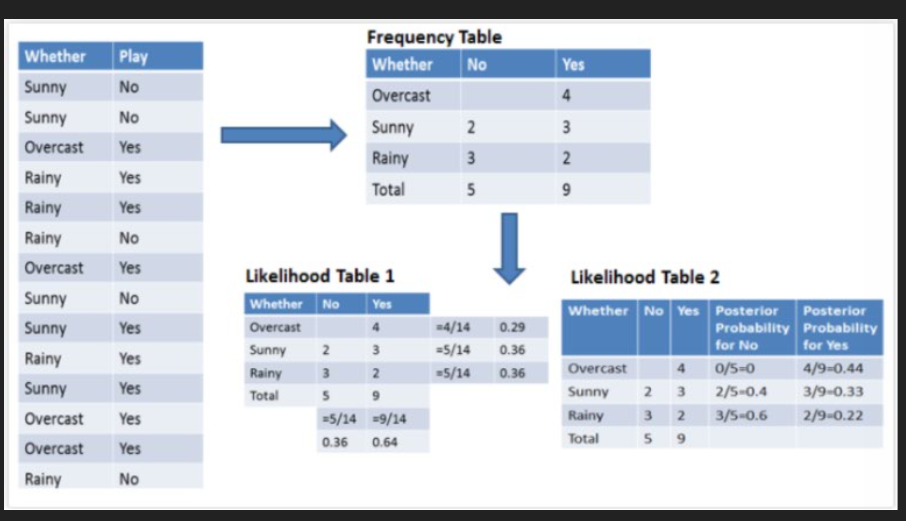

### 문제] 날씨가 흐림(overcast)일 때 경기할 확률은?

**P(Yes|overcast) = P(overcast|Yes)P(Yes) / P(overcast) 베이즈정리**

#### 1. 사전확률

P(overcast) = 4/14 = 0.29

P(yes) = 9/14 = 0.64

#### 2. 사후확률

P(overcast|yes) = 4/9 = 0.44

#### 3. 베이즈 정리 공식에 대입

P(Yes|overcast) = P(overcast|Yes)P(Yes) / P(overcast)

0.97 = (0.44 * 0.64) / 0.29

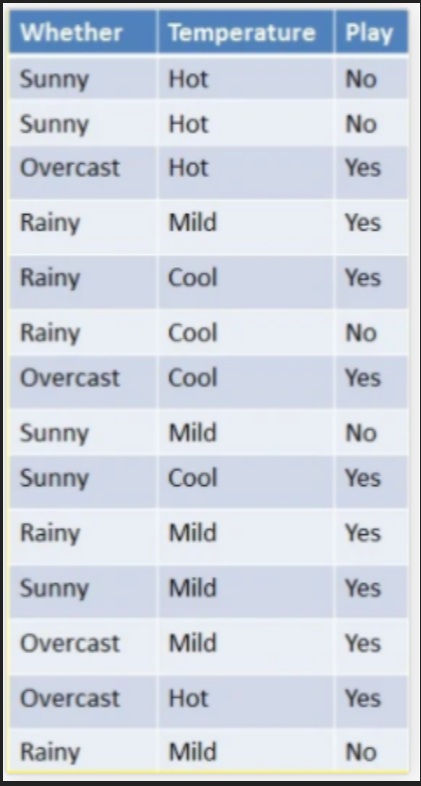

### 사이킷런을 활용한 나이브베이즈 다중 분류 : 날씨,기온

- Feature(Weather, Temp), 1개의 Label(Play) -> datasets

In [5]:
weather = ['Sunny', 'Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']

Temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

- Feature Encoding : 문자형 숫자형으로 바꿔주기

In [9]:
# Feature Encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

weather_encoded = le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


**Sunny : 2, Rainy : 1, Overcast : 0**

**Mild : 2, Hot : 1, Cool : 0**

**Yes : 1, No : 0**

In [11]:
temp_encoded = le.fit_transform(Temp)
label = le.fit_transform(play)
print(temp_encoded)
print()
print(label)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


### 인코딩된 두개의 Feature를 결합시킨다.

In [12]:
feature = zip(weather_encoded, temp_encoded)
feature = list(feature)

print(feature)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


### 나이브 베이즈 모델링
1) 모델 생성

2) 데이터 피팅

3) 성능 평가

In [16]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(feature, label)

predicted = model.predict([[0,2]]) # 0 : Overcast, 2 : Mild
print('Overcast_Mild :',predicted) # Yes : 1, No : 0

Overcast_Mild : [1]


## 시간에 따른 맥주 주문 현황

In [39]:
Time = ['Mor','Mor','Lun','Lun','Lun','Eve','Eve','Eve','Eve','Eve']
Beer = ['Non','Non','Ord','Non','Non','Ord','Ord','Ord','Non','Non']

In [40]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

time_encoded = le.fit_transform(Time)
label = le.fit_transform(Beer)

In [47]:
feature = zip(time_encoded, label)
feature = list(feature)
feature

[(2, 0),
 (2, 0),
 (1, 1),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 0)]

In [76]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(feature, label)

predicted = model.predict([[2,0]])
predicted

array([0], dtype=int64)

# 가우시안 나이브베이즈 : iris

In [49]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

# 모델링의 동일한 결과 출력을 구한다.
import numpy as np

np.random.seed(5)

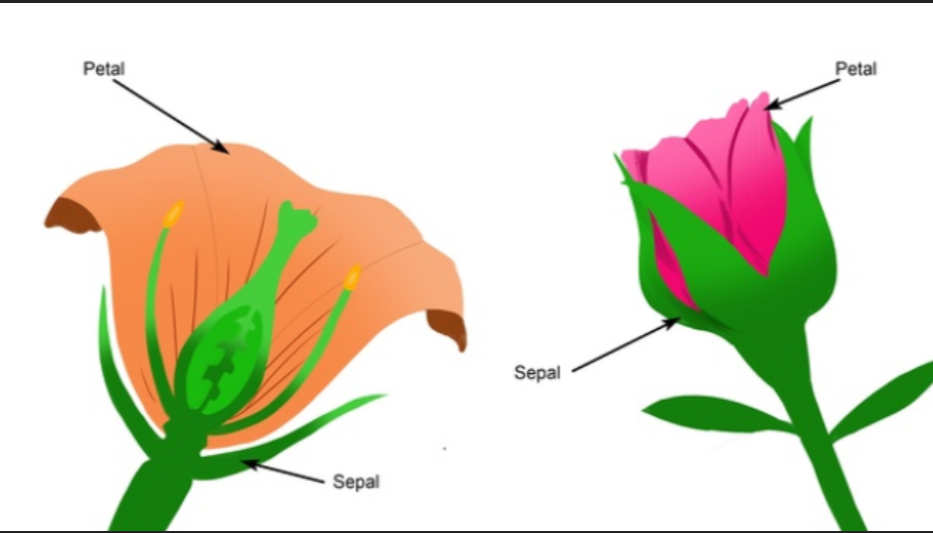

### iris 데이터 시각화

붓꽃 종류 = setosa, versicolor, virginica

In [64]:
dataset = load_iris()

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target

# 숫자값을 문자값으로 바꿔줌
df.target = df.target.map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- sepal length (cm)	: 꽃받침의 길이
- sepal width (cm)	: 꽃받침의 너비(폭)
- petal length (cm)	: 꽃잎의 길이
- petal width (cm)  : 꽃잎의 너비(폭)

In [65]:
# 특정 필드의 항목을 구한다.

df.target.value_counts()

versicolor    50
setosa        50
virginica     50
Name: target, dtype: int64

In [66]:
# 시각화를 위하여 데이터를 분류값별로 나눈다.

setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

### sepal length : 꽃받침의 길이 시각화

<AxesSubplot:label='214b8b24-8171-4859-bc81-c76199688fa2'>

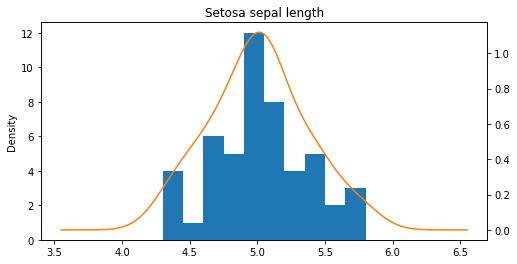

In [67]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde',
                                   ax=ax,
                                   secondary_y=True,
                                   title = 'Setosa sepal length',
                                   figsize = (8,4))

<AxesSubplot:label='48ee482f-c2e8-49d7-9205-b09361e7e9ac'>

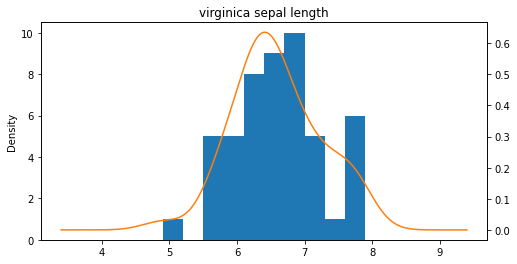

In [68]:
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde',
                                   ax=ax,
                                   secondary_y=True,
                                   title = 'virginica sepal length',
                                   figsize = (8,4))

<AxesSubplot:label='f3bef5a5-d685-4734-b31d-470e59d247c9'>

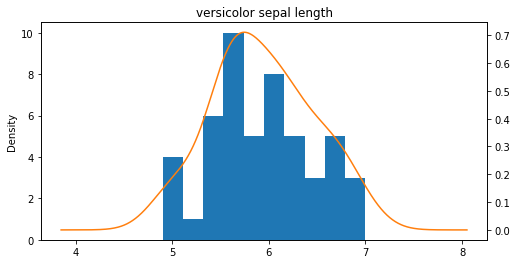

In [69]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde',
                                   ax=ax,
                                   secondary_y=True,
                                   title = 'versicolor sepal length',
                                   figsize = (8,4))

<AxesSubplot:label='94cd0d67-9853-4110-bbee-0e3b666039f9'>

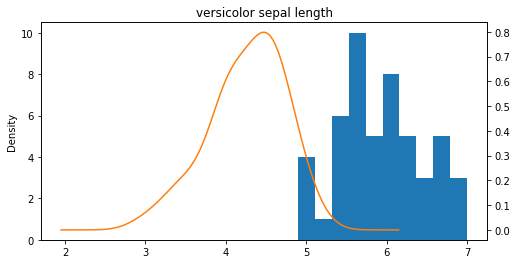

In [71]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['petal length (cm)'].plot(kind='kde',
                                   ax=ax,
                                   secondary_y=True,
                                   title = 'versicolor sepal length',
                                   figsize = (8,4))

## 학습 & 테스트 데이터 나누기

In [74]:
# 테스트 20%

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

## 가우시안 모델링

In [77]:
model = GaussianNB()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

In [78]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [79]:
# 정확도
accuracy_score(y_test, predicted)

0.9

In [80]:
# 실제값과 비교
print(metrics.confusion_matrix(expected, predicted))

[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]


# 베르누이 나이브베이즈 : 스팸 메일 분류

In [90]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score

# 모델링의 동일한 결과 출력을 구한다.
import numpy as np

np.random.seed(5)

- free game only today -------------------------- 오늘만 무료 게임
- cheapest flight deal ---------------------------- 저렴한 항공편 거래
- limited time offer only today only today------- 오늘만 오늘만 기간 한정 제공
- today meeting schedule ----------------------- 오늘 회의 일정
- your flight schedule attached ----------------- 비행 스케줄 첨부
- your credit card statement -------------------- 신용 카드 명세서

In [84]:
email_list = [
    {'email title' : 'free game only today', 'spam':True},
    {'email title' : 'cheapest flight deal', 'spam':True},
    {'email title' : 'limited time offer only today only today', 'spam':True},
    {'email title' : 'today meeting schedule', 'spam':False},
    {'email title' : 'your flight schedule attached', 'spam':False},
    {'email title' : 'your credit card statement', 'spam':False}
]

df = pd.DataFrame(email_list)
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


### 데이터 다듬기 : 부울값을 숫자로 치환

In [86]:
df['label'] = df['spam'].map({True:1, False:0})
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


### 학습에 사용할 데이터와 분류값을 나눈다.

- 이메일 제목으로 학습을 진행한 후 label을 사용해 스팸메일 여부를 판단한다.

In [87]:
df_x = df['email title']
df_y = df['label']

베르누이 나이브베이즈의 입력 데이터는 고정된 크기의 벡터로, 0과 1로 구분된 데이터이어야 한다.

sklearn의 CountVectorizer를 사용하여 쉽게 구현할 수 있다.

In [91]:
cv = CountVectorizer(binary = True)
x_traincv = cv.fit_transform(df_x)

In [97]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

벡터로 인코딩된 이메일 제목에 어떤 단어들이 포함되어 있는지 확인한다.

In [98]:
cv.inverse_transform(encoded_input[0])

[array(['free', 'game', 'only', 'today'], dtype='<U9')]

In [99]:
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

### 베르누이 학습 모델링

In [102]:
bnb = BernoulliNB()
y_train = df_y.astype('int')
bnb.fit(x_traincv, y_train)

BernoulliNB()

In [103]:
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df['spam'].map({True:1,False:0})
test_x=test_df["email title"]
test_y=test_df["label"]
x_testcv=cv.transform(test_x)

### 테스트

In [104]:
predictions = bnb.predict(x_testcv)

### 정확도

In [105]:
accuracy_score(test_y,predictions)

0.8333333333333334